## **Principal Component Analysis of Kidney Stone Dataset**

In [99]:
!pip install pycaret==3.0.0

  Using cached pycaret-3.0.0-py3-none-any.whl (481 kB)
ERROR: Operation cancelled by user


In [100]:
from pycaret.utils import version
version()

'3.0.0'

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [102]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


Dataset

The “Kidney Stone Data Set” used for Principle Component Analysis (PCA) and classification models is obtained from Kaggle. The data set provided information about various characteristics and laboratory test results on patients with kidney stones.

There are 6 attributes with 90 entries and one column for classification. 0 represents "Absence of stone" and 1 represents "Presence of stone"

All attributes are numerical and they are listed bellow:

Specific_Gravity_Of_Urine = gravity

ph_Of_Urine = ph

Osmolarity_Of_Urine = osmo

Conductivity_Of_Urine = cond

Concentration_Of_Urea_In_Urine = urea

Concentration_Of_Calcium_In_Urine = calc

target (Label)

The original dataset can be found on below link: https://www.kaggle.com/datasets/harshghadiya/kidneystone

In [103]:
df = pd.read_csv('https://github.com/DineshKumarS26/Cardio-vascular/raw/main/6220%20DATA%20SET%20csv.csv')
df.head(25)

id  age in days  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0    0        18393       2     168    62.0    110     80            1     1   
1    1        20228       1     156    85.0    140     90            3     1   
2    2        18857       1     165    64.0    130     70            3     1   
3    3        17623       2     169    82.0    150    100            1     1   
4    4        17474       1     156    56.0    100     60            1     1   
5    8        21914       1     151    67.0    120     80            2     2   
6    9        22113       1     157    93.0    130     80            3     1   
7   12        22584       2     178    95.0    130     90            3     3   
8   13        17668       1     158    71.0    110     70            1     1   
9   14        19834       1     164    68.0    110     60            1     1   
10  15        22530       1     169    80.0    120     80            1     1   
11  16        18815       2     173    60.0    120     80            1     1   
12  18        14791       2     165    60.0    120     80            1     1   
13  21        19809       1     158    78.0    110     70            1     1   
14  23        14532       2     181    95.0    130     90            1     1   
15  24        16782       2     172   112.0    120     80            1     1   
16  25        21296       1     170    75.0    130     70            1     1   
17  27        16747       1     158    52.0    110     70            1     3   
18  28        17482       1     154    68.0    100     70            1     1   
19  29        21755       2     162    56.0    120     70            1     1   
20  30        19778       2     163    83.0    120     80            1     1   
21  31        21413       1     157    69.0    130     80            1     1   
22  32        23046       1     158    90.0    145     85            2     2   
23  33        23376       2     156    45.0    110     60            1     1   
24  35        16608       1     170    68.0    150     90            3     1   

    smoke  alco  active  cardio  
0       0     0       1       0  
1       0     0       1       1  
2       0     0       0       1  
3       0     0       1       1  
4       0     0       0       0  
5       0     0       0       0  
6       0     0       1       0  
7       0     0       1       1  
8       0     0       1       0  
9       0     0       0       0  
10      0     0       1       0  
11      0     0       1       0  
12      0     0       0       0  
13      0     0       1       0  
14      1     1       1       0  
15      0     0       0       1  
16      0     0       0       0  
17      0     0       1       0  
18      0     0       0       0  
19      1     0       1       0  
20      0     0       1       0  
21      0     0       1       0  
22      0     0       1       1  
23      0     0       1       0  
24      0     0       1       1

In [104]:
len(df.index)

1999

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1999 non-null   int64  
 1   age in days  1999 non-null   int64  
 2   gender       1999 non-null   int64  
 3   height       1999 non-null   int64  
 4   weight       1999 non-null   float64
 5   ap_hi        1999 non-null   int64  
 6   ap_lo        1999 non-null   int64  
 7   cholesterol  1999 non-null   int64  
 8   gluc         1999 non-null   int64  
 9   smoke        1999 non-null   int64  
 10  alco         1999 non-null   int64  
 11  active       1999 non-null   int64  
 12  cardio       1999 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 203.1 KB


In [106]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [107]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

KeyboardInterrupt: ignored

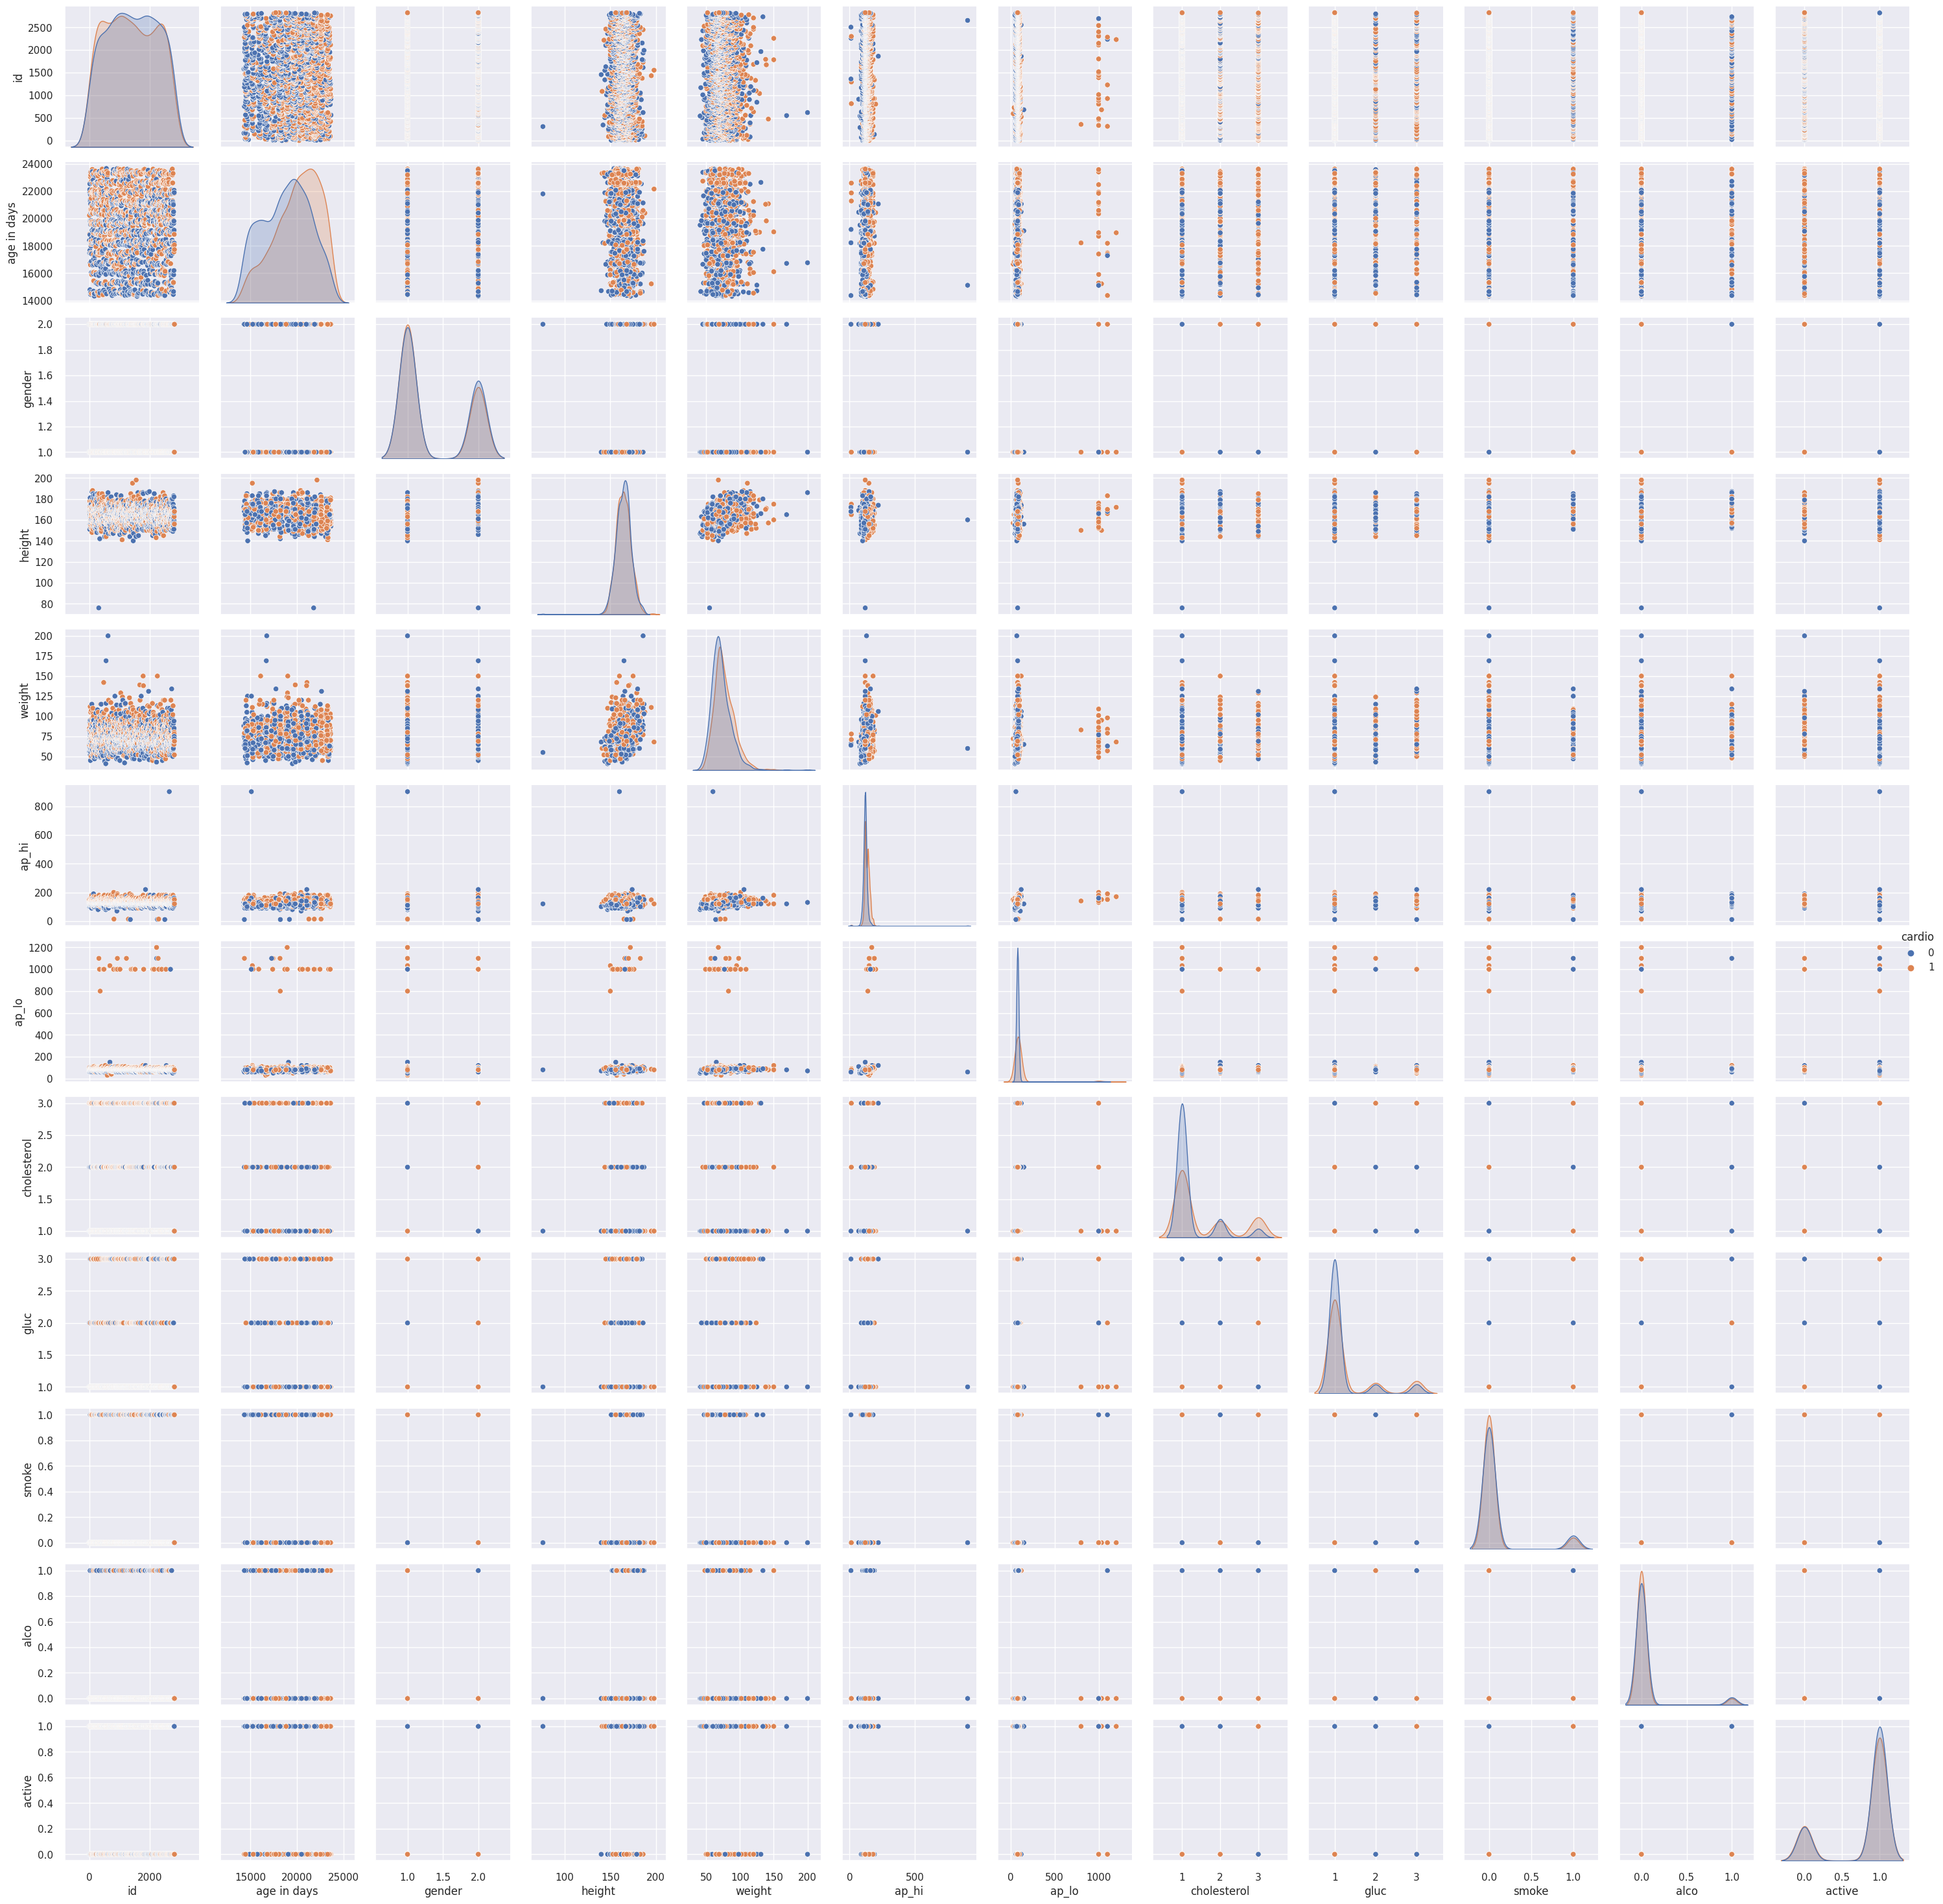

In [108]:
sns.pairplot(df, hue='cardio')
plt.show()

In [ ]:
y =df['cardio']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['cardio'])
X.head(10)

In [ ]:
X.describe().transpose()

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

In [ ]:
X.describe().transpose()

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

In [ ]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

In [ ]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

In [ ]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

# Principal Component Analysis (PCA)

Text(0, 0.5, 'Z2')

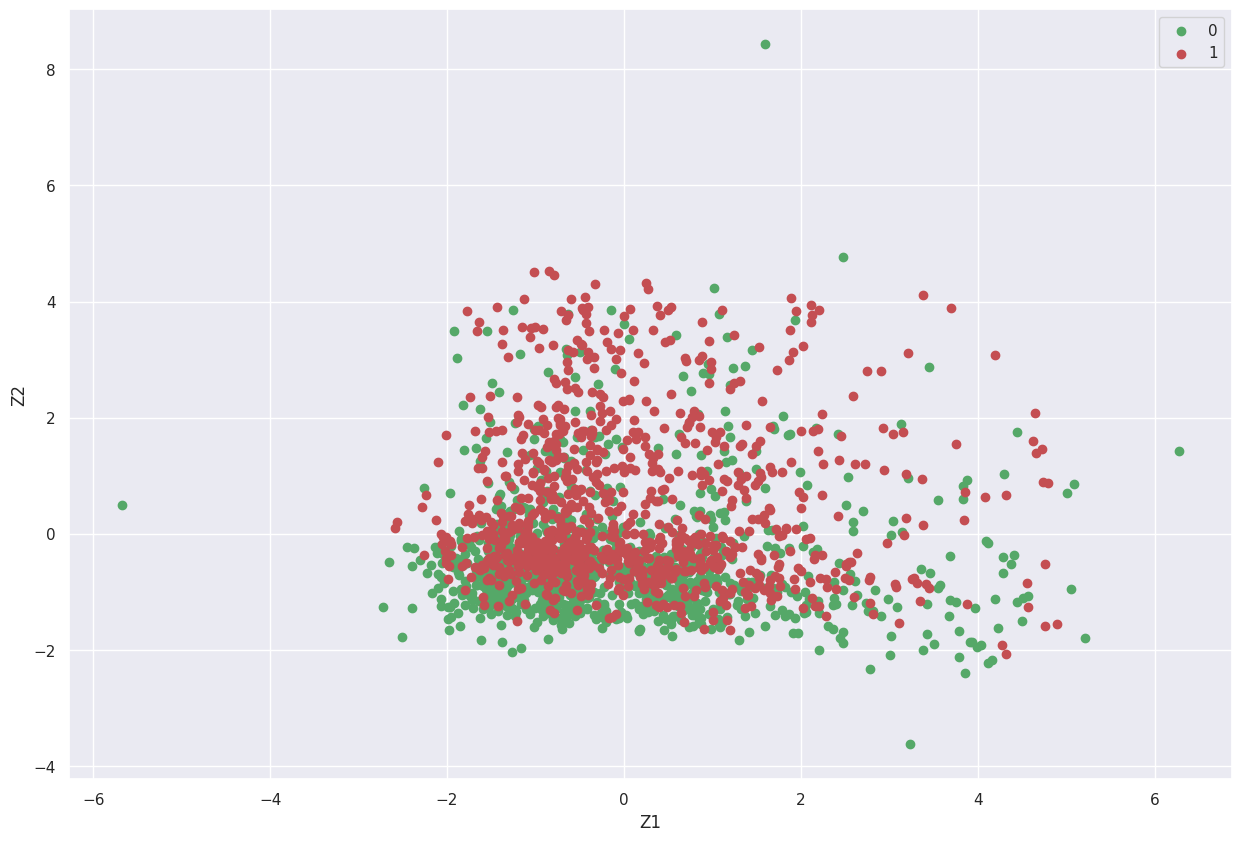

In [20]:
pca = PCA()
Z = pca.fit_transform(X)


idx_0= np.where(y == 0)
idx_1 = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_0,0], Z[idx_0,1], c='g', label='0')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label='1')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

**Eigenvectors**

array([[-0.00488422, -0.01498397, -0.1112328 ,  0.03477928,  0.86344087,
         0.47949671,  0.01669118, -0.04160086,  0.06035872, -0.06676586,
        -0.01463416,  0.01994515],
       [-0.0473598 ,  0.3324979 , -0.06112081,  0.0315359 , -0.12360725,
         0.27786113, -0.82800149, -0.1308045 , -0.24558583,  0.03972457,
         0.12545429, -0.09828969],
       [ 0.52312463, -0.10139071,  0.0564366 , -0.089662  ,  0.00291738,
        -0.07045932, -0.2208618 , -0.3894206 ,  0.31189211,  0.05439404,
        -0.10741777,  0.62262416],
       [ 0.50894377, -0.10678168,  0.29490176, -0.26522757,  0.13925278,
        -0.10448939, -0.04809006, -0.13723174,  0.01891346,  0.29725481,
         0.0218164 , -0.65697224],
       [ 0.33481942,  0.20504344,  0.39736805, -0.20495419,  0.1127377 ,
        -0.03414029,  0.04185027,  0.45398103, -0.50699802, -0.29275349,
         0.07934616,  0.27417618],
       [ 0.09103609,  0.30998999,  0.31193751,  0.48911281,  0.05908367,
        -0.08318249, -

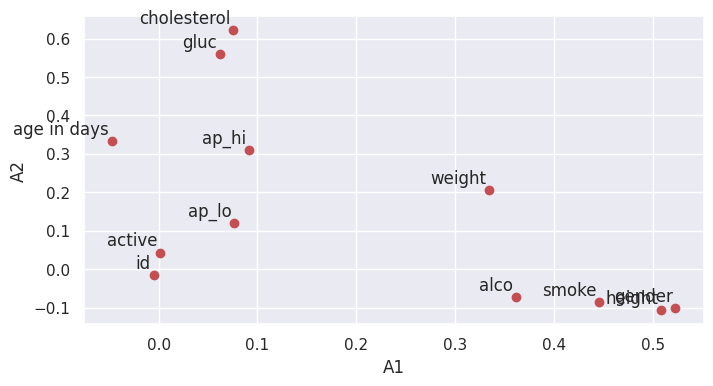

In [21]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A


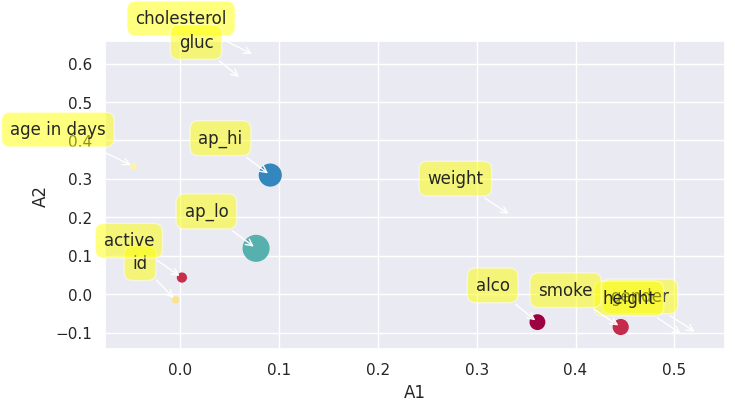

In [22]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree Plot and Eigenvalues**

array([2.01781814, 1.67697471, 1.20743487, 1.1148176 , 1.01469244,
       0.9570164 , 0.93809614, 0.85300533, 0.74779537, 0.56943067,
       0.50090368, 0.40802065])

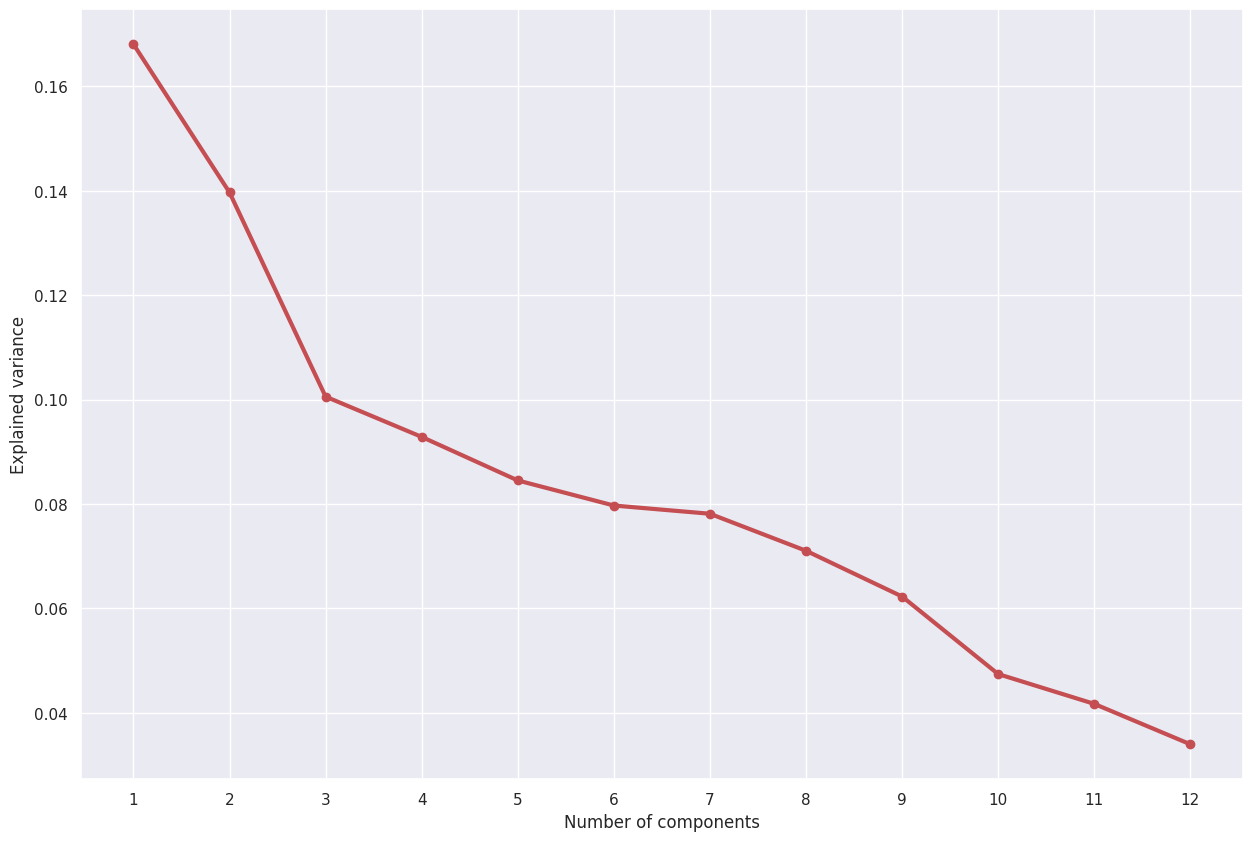

In [23]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

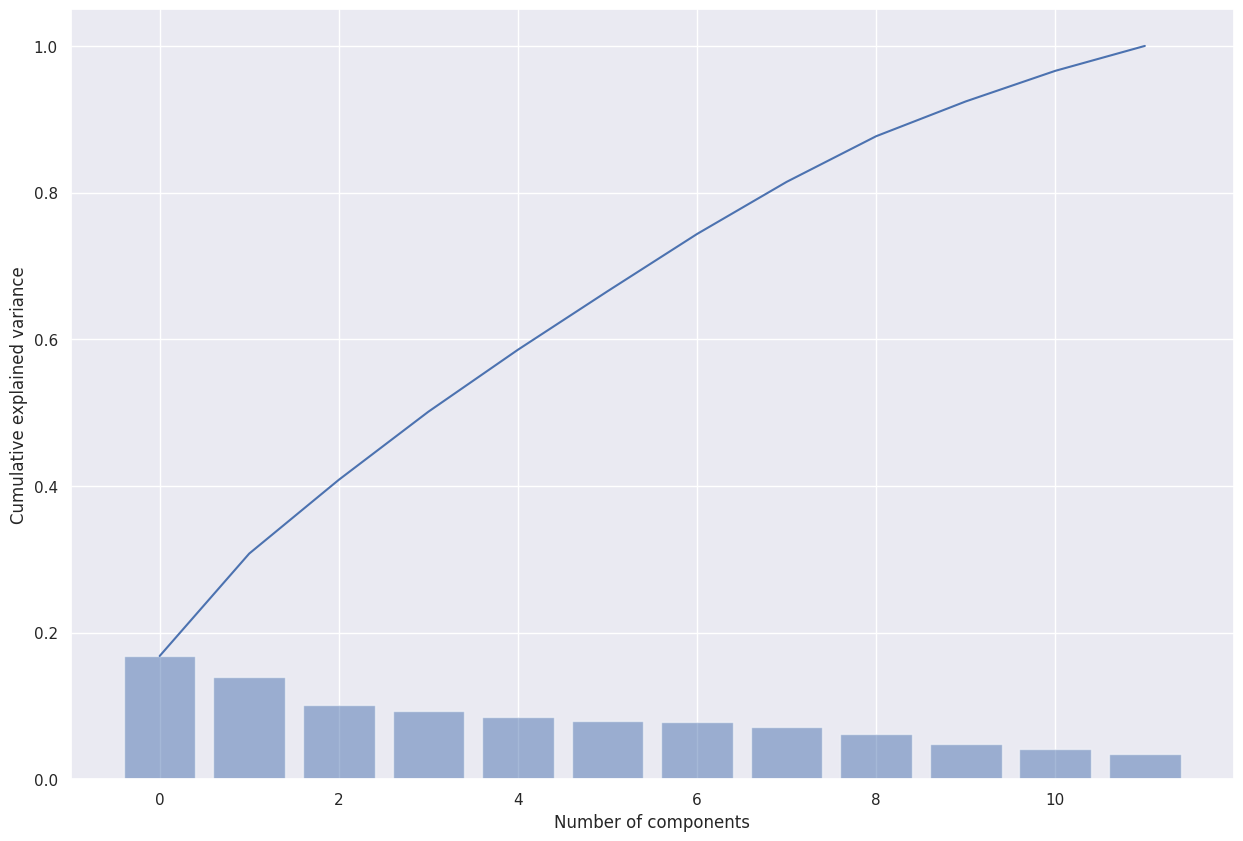

In [24]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([-1.19456803,  1.9100191 ,  1.06704657, ..., -0.78891417,
       -0.96542427, -0.3250063 ])

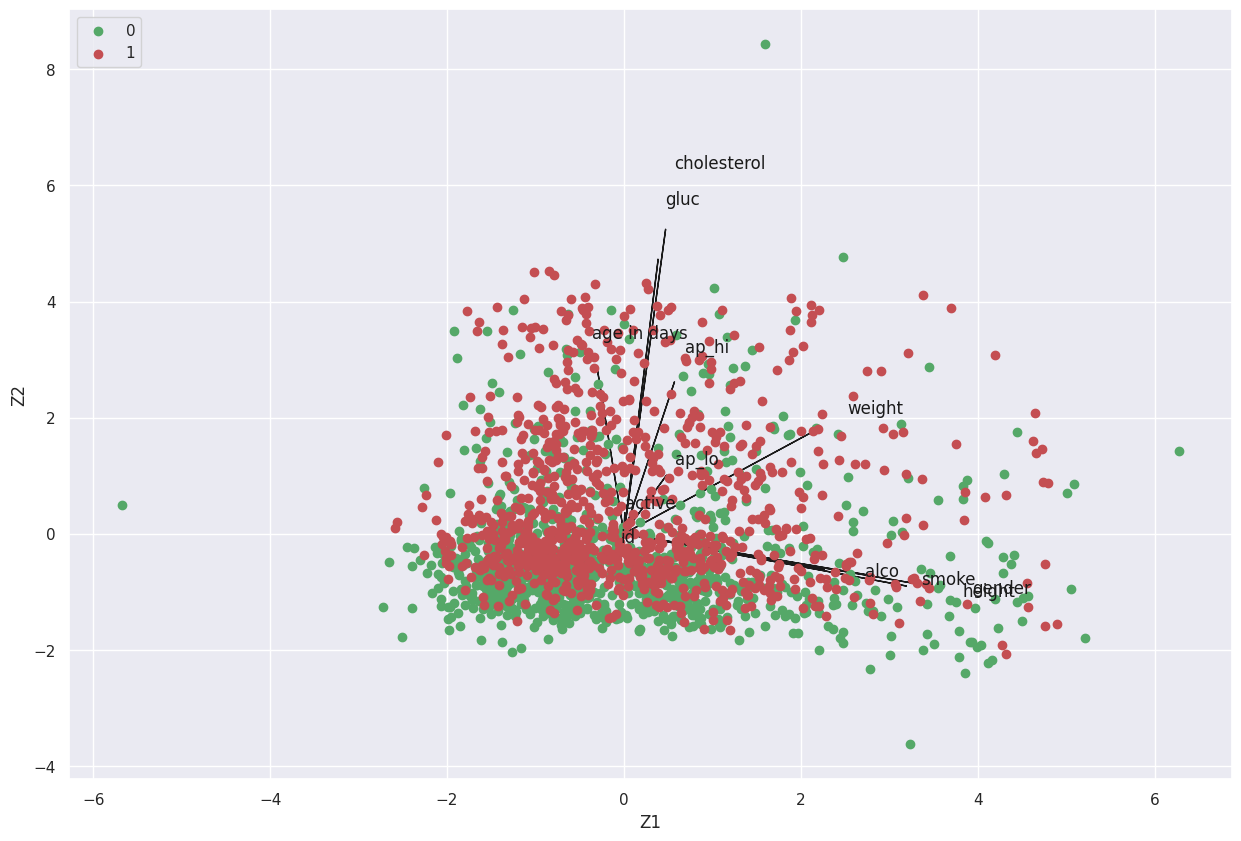

In [25]:
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_0,0], Z[idx_0,1], c='g', label='0')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label='1')

plt.legend(loc='upper left')
Z1
Z2

# Using PCA Library

In [26]:
!pip install pca

In [27]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [12] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [11] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [12] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[11]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [28]:
out['PC']

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.313459 -1.194568  0.041322 -0.475003 -1.209235 -1.477376 -0.338087   
1    -0.717554  1.910019  0.034234  0.091432 -1.331942 -1.126134 -0.058129   
2    -0.651036  1.067047  0.617760 -0.455373 -2.272372  0.606217  0.873484   
3     1.000936 -0.515279  1.177360  0.119256 -0.895695 -1.763613 -0.212427   
4    -1.705205 -1.282115  0.128799 -0.345595 -2.423612  0.691096  1.071566   
...        ...       ...       ...       ...       ...       ...       ...   
1994  2.744618  2.805853 -2.030607 -0.332566  1.247563  0.468461  1.155292   
1995  0.532548 -0.340949  0.131585 -0.064459  1.732973  0.485867 -1.505372   
1996 -1.265433 -0.788914 -0.615126 -0.010234  1.663178  0.431627  0.316709   
1997 -0.065295 -0.965424 -1.083982  1.734570  0.022038  2.651297  0.852134   
1998  0.607124 -0.325006  0.728478 -0.648947  0.885331  1.971497  0.698658   

           PC8       PC9      PC10      PC11  
0    -0.989547  0.392295  0.562984 -0.163299  
1     0.916525 -0.455388 -0.468424 -1.733518  
2    -0.036110  0.597161  0.248324 -1.990512  
3     0.224362  0.650303  0.245335  0.069854  
4    -0.340515  0.191281  0.105179 -0.150807  
...        ...       ...       ...       ...  
1994 -1.184098  1.364236 -2.001975  0.443667  
1995 -0.569184  0.281937  0.111564  0.110205  
1996  0.222837 -0.357144 -0.395252  0.024640  
1997 -0.019810  1.746183 -2.355659  0.347021  
1998 -0.955293  1.066303  0.169167 -1.279647  

[1999 rows x 11 columns]

**Scatter plot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '11 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (16.8% expl.var)', ylabel='PC2 (13.9% expl.var)'>)

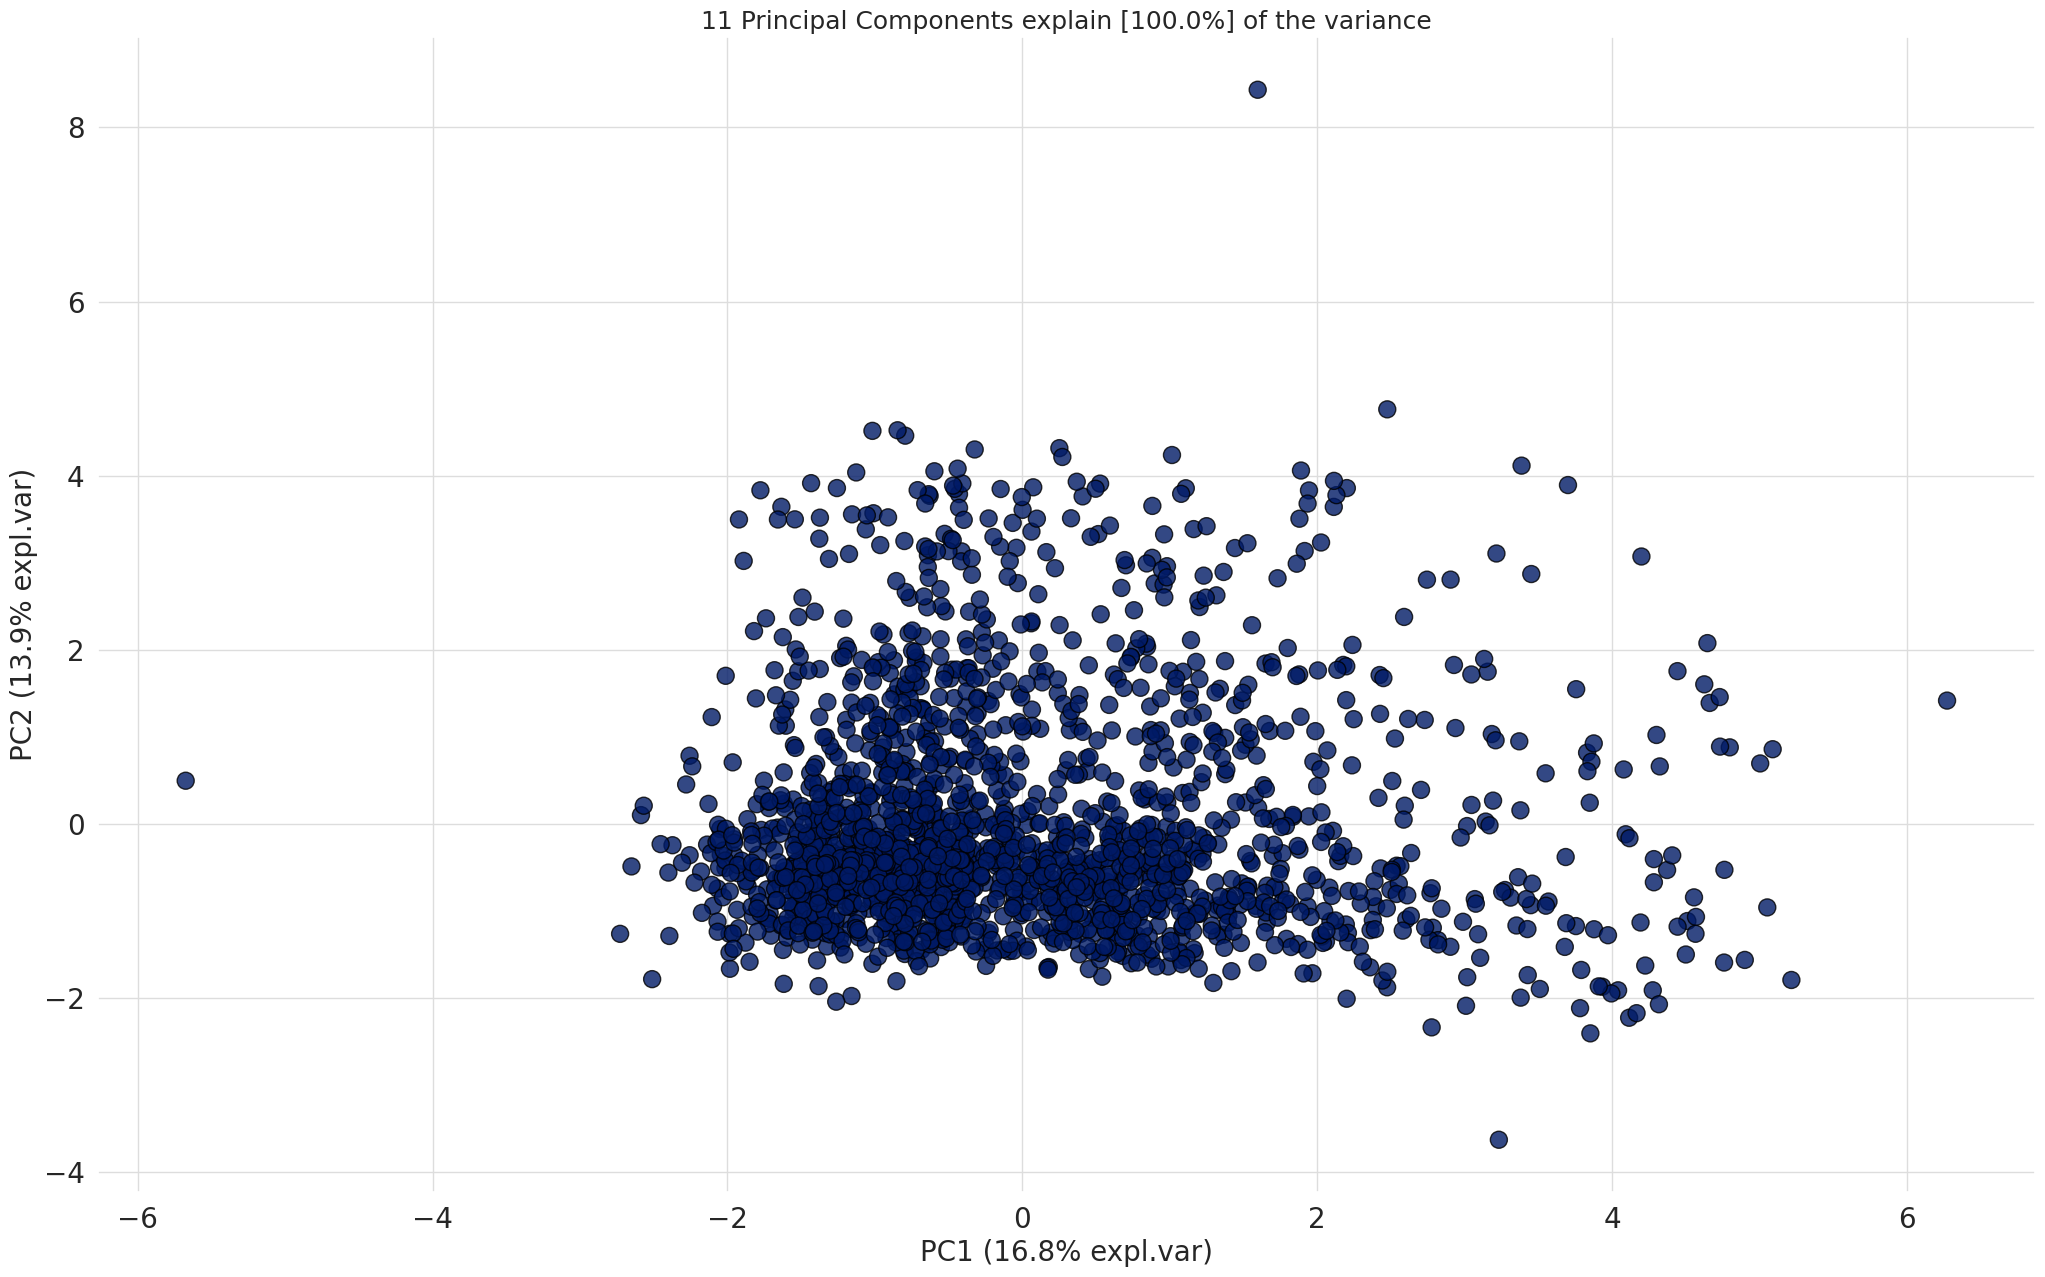

In [29]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [30]:
A = out['loadings'].T
A

PC1       PC2       PC3       PC4       PC5       PC6  \
id          -0.004884 -0.014984 -0.111233  0.034779  0.863441  0.479497   
age in days -0.047360  0.332498 -0.061121  0.031536 -0.123607  0.277861   
gender       0.523125 -0.101391  0.056437 -0.089662  0.002917 -0.070459   
height       0.508944 -0.106782  0.294902 -0.265228  0.139253 -0.104489   
weight       0.334819  0.205043  0.397368 -0.204954  0.112738 -0.034140   
ap_hi        0.091036  0.309990  0.311938  0.489113  0.059084 -0.083182   
ap_lo        0.076676  0.119372  0.253367  0.682742  0.048176 -0.055859   
cholesterol  0.075120  0.621711 -0.145368 -0.129629 -0.024235  0.001057   
gluc         0.061664  0.560525 -0.199857 -0.225522 -0.005920 -0.009410   
smoke        0.445743 -0.085320 -0.393889  0.225393 -0.173800  0.115351   
alco         0.361448 -0.072686 -0.455042  0.216752 -0.115759  0.219037   
active       0.001621  0.043310 -0.388654  0.081171  0.396283 -0.777442   

                  PC7       PC8       PC9      PC10      PC11  
id           0.016691 -0.041601  0.060359 -0.066766 -0.014634  
age in days -0.828001 -0.130805 -0.245586  0.039725  0.125454  
gender      -0.220862 -0.389421  0.311892  0.054394 -0.107418  
height      -0.048090 -0.137232  0.018913  0.297255  0.021816  
weight       0.041850  0.453981 -0.506998 -0.292753  0.079346  
ap_hi       -0.137566  0.416321  0.584818  0.020360  0.102562  
ap_lo        0.222482 -0.462587 -0.413123  0.098652 -0.010534  
cholesterol  0.150966 -0.059681  0.044427 -0.030152 -0.728570  
gluc         0.324682 -0.209503  0.102096  0.121266  0.642922  
smoke        0.046899 -0.037330  0.049364 -0.678748  0.096060  
alco         0.084238  0.405785 -0.186314  0.574811 -0.032950  
active      -0.235294  0.061328 -0.138324 -0.008542  0.025111

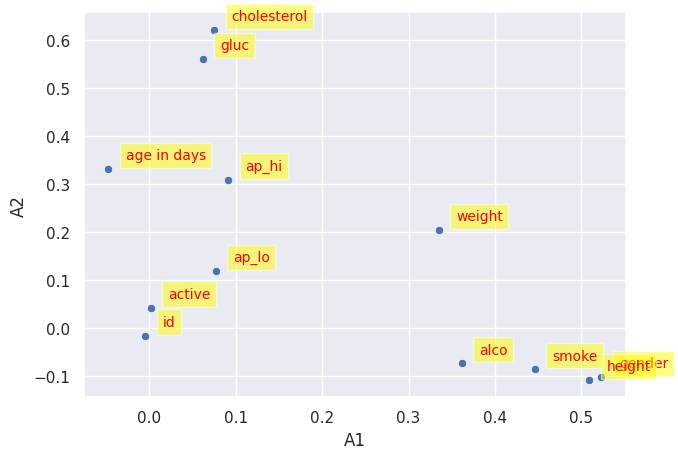

In [31]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

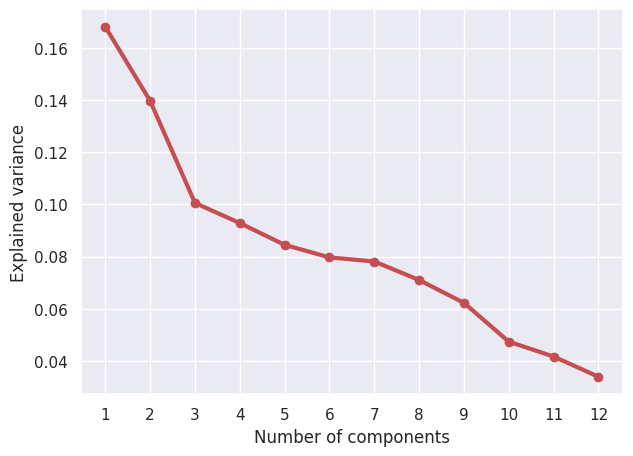

In [32]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

In [33]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '11 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (16.8% expl.var)', ylabel='PC2 (13.9% expl.var)'>)

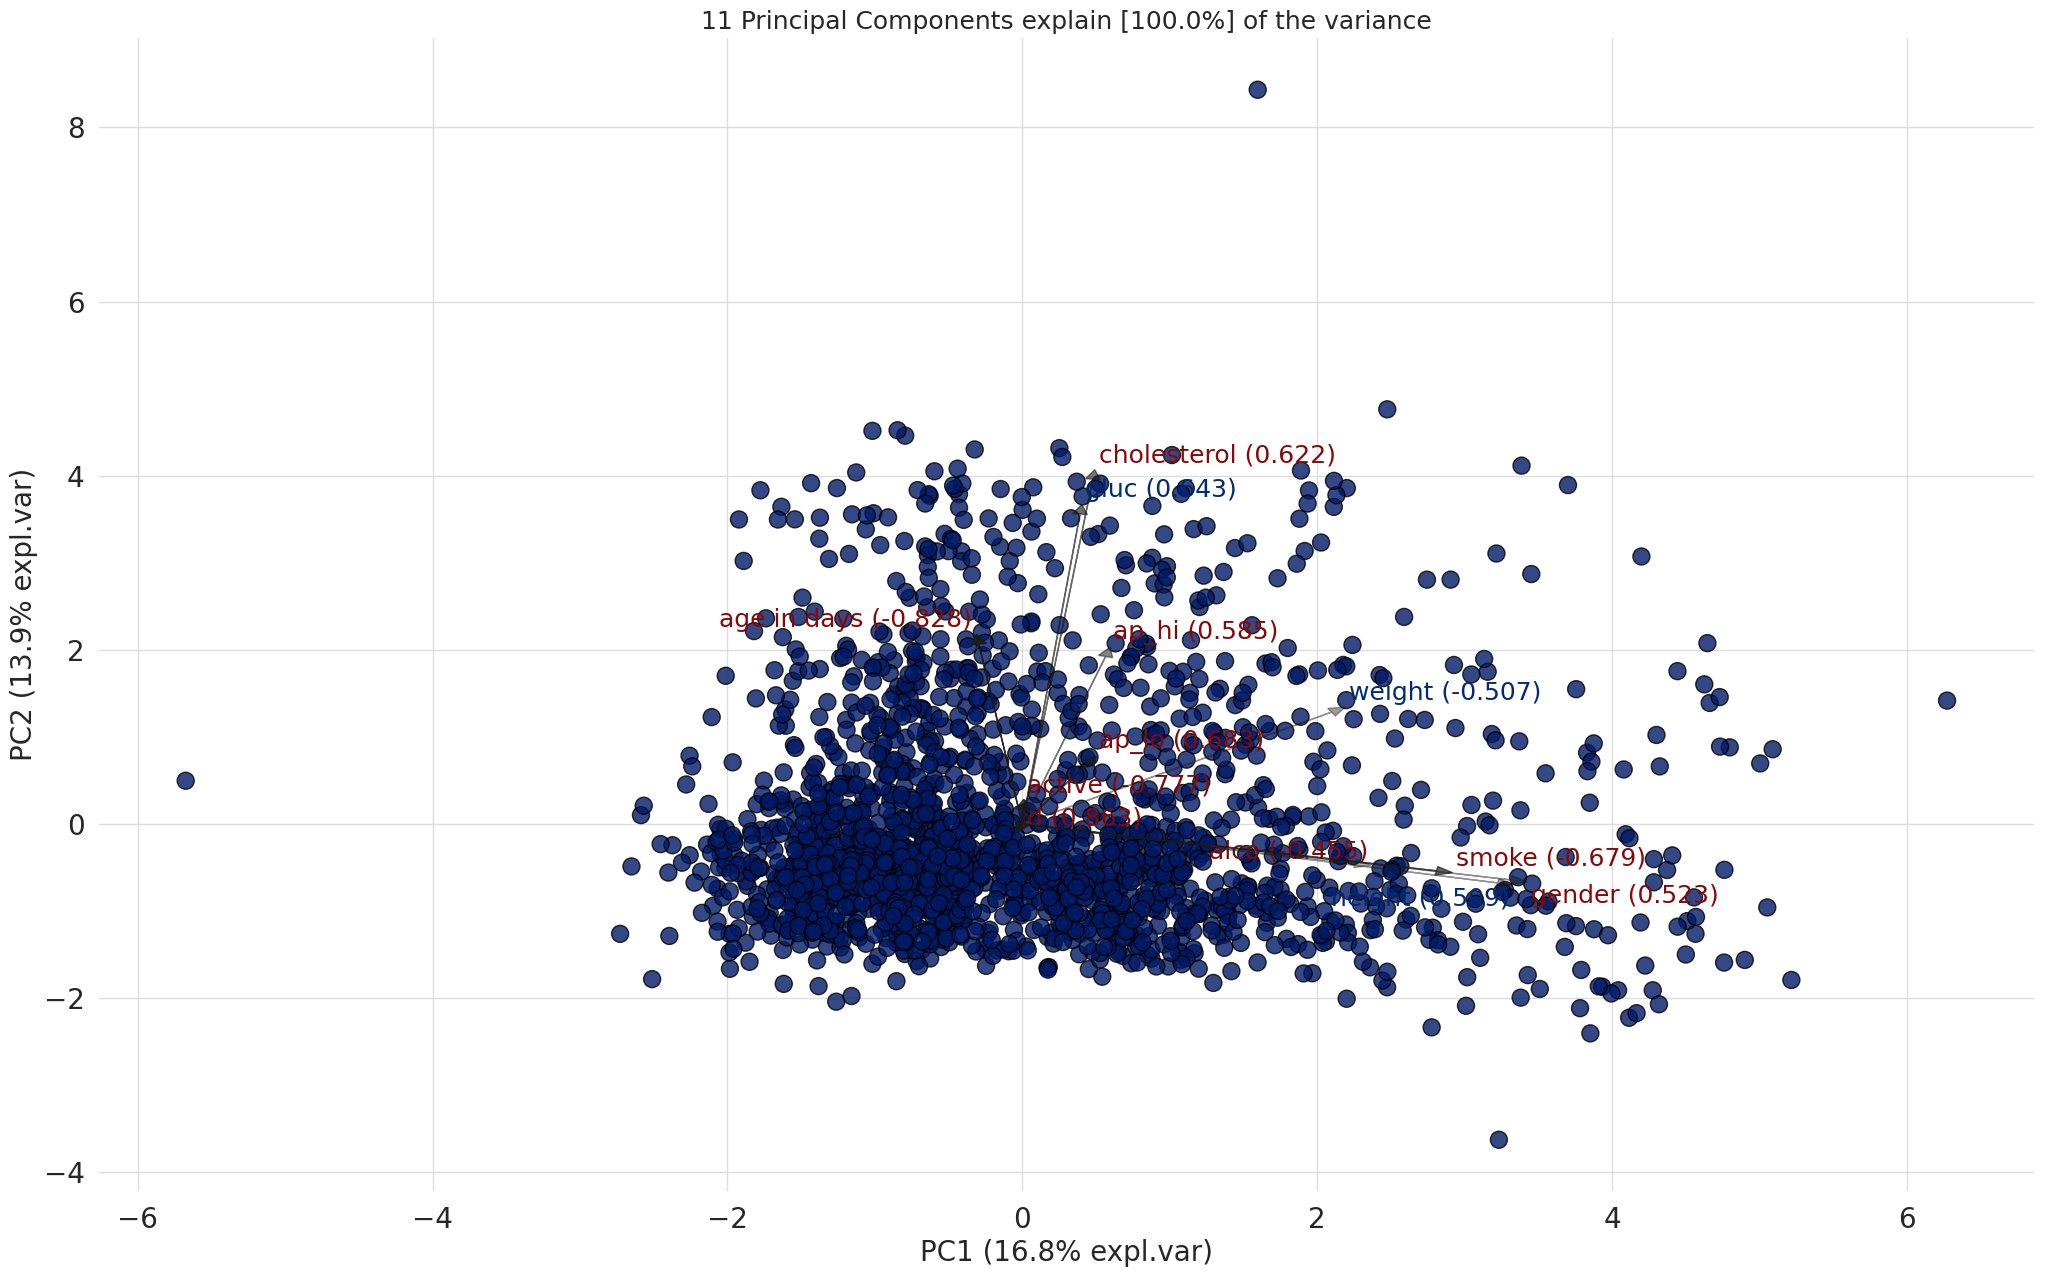

In [34]:
model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3DSubplot: title={'center': '11 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (16.8% expl.var)', ylabel='PC2 (13.9% expl.var)', zlabel='PC3 (10.0% expl.var)'>)

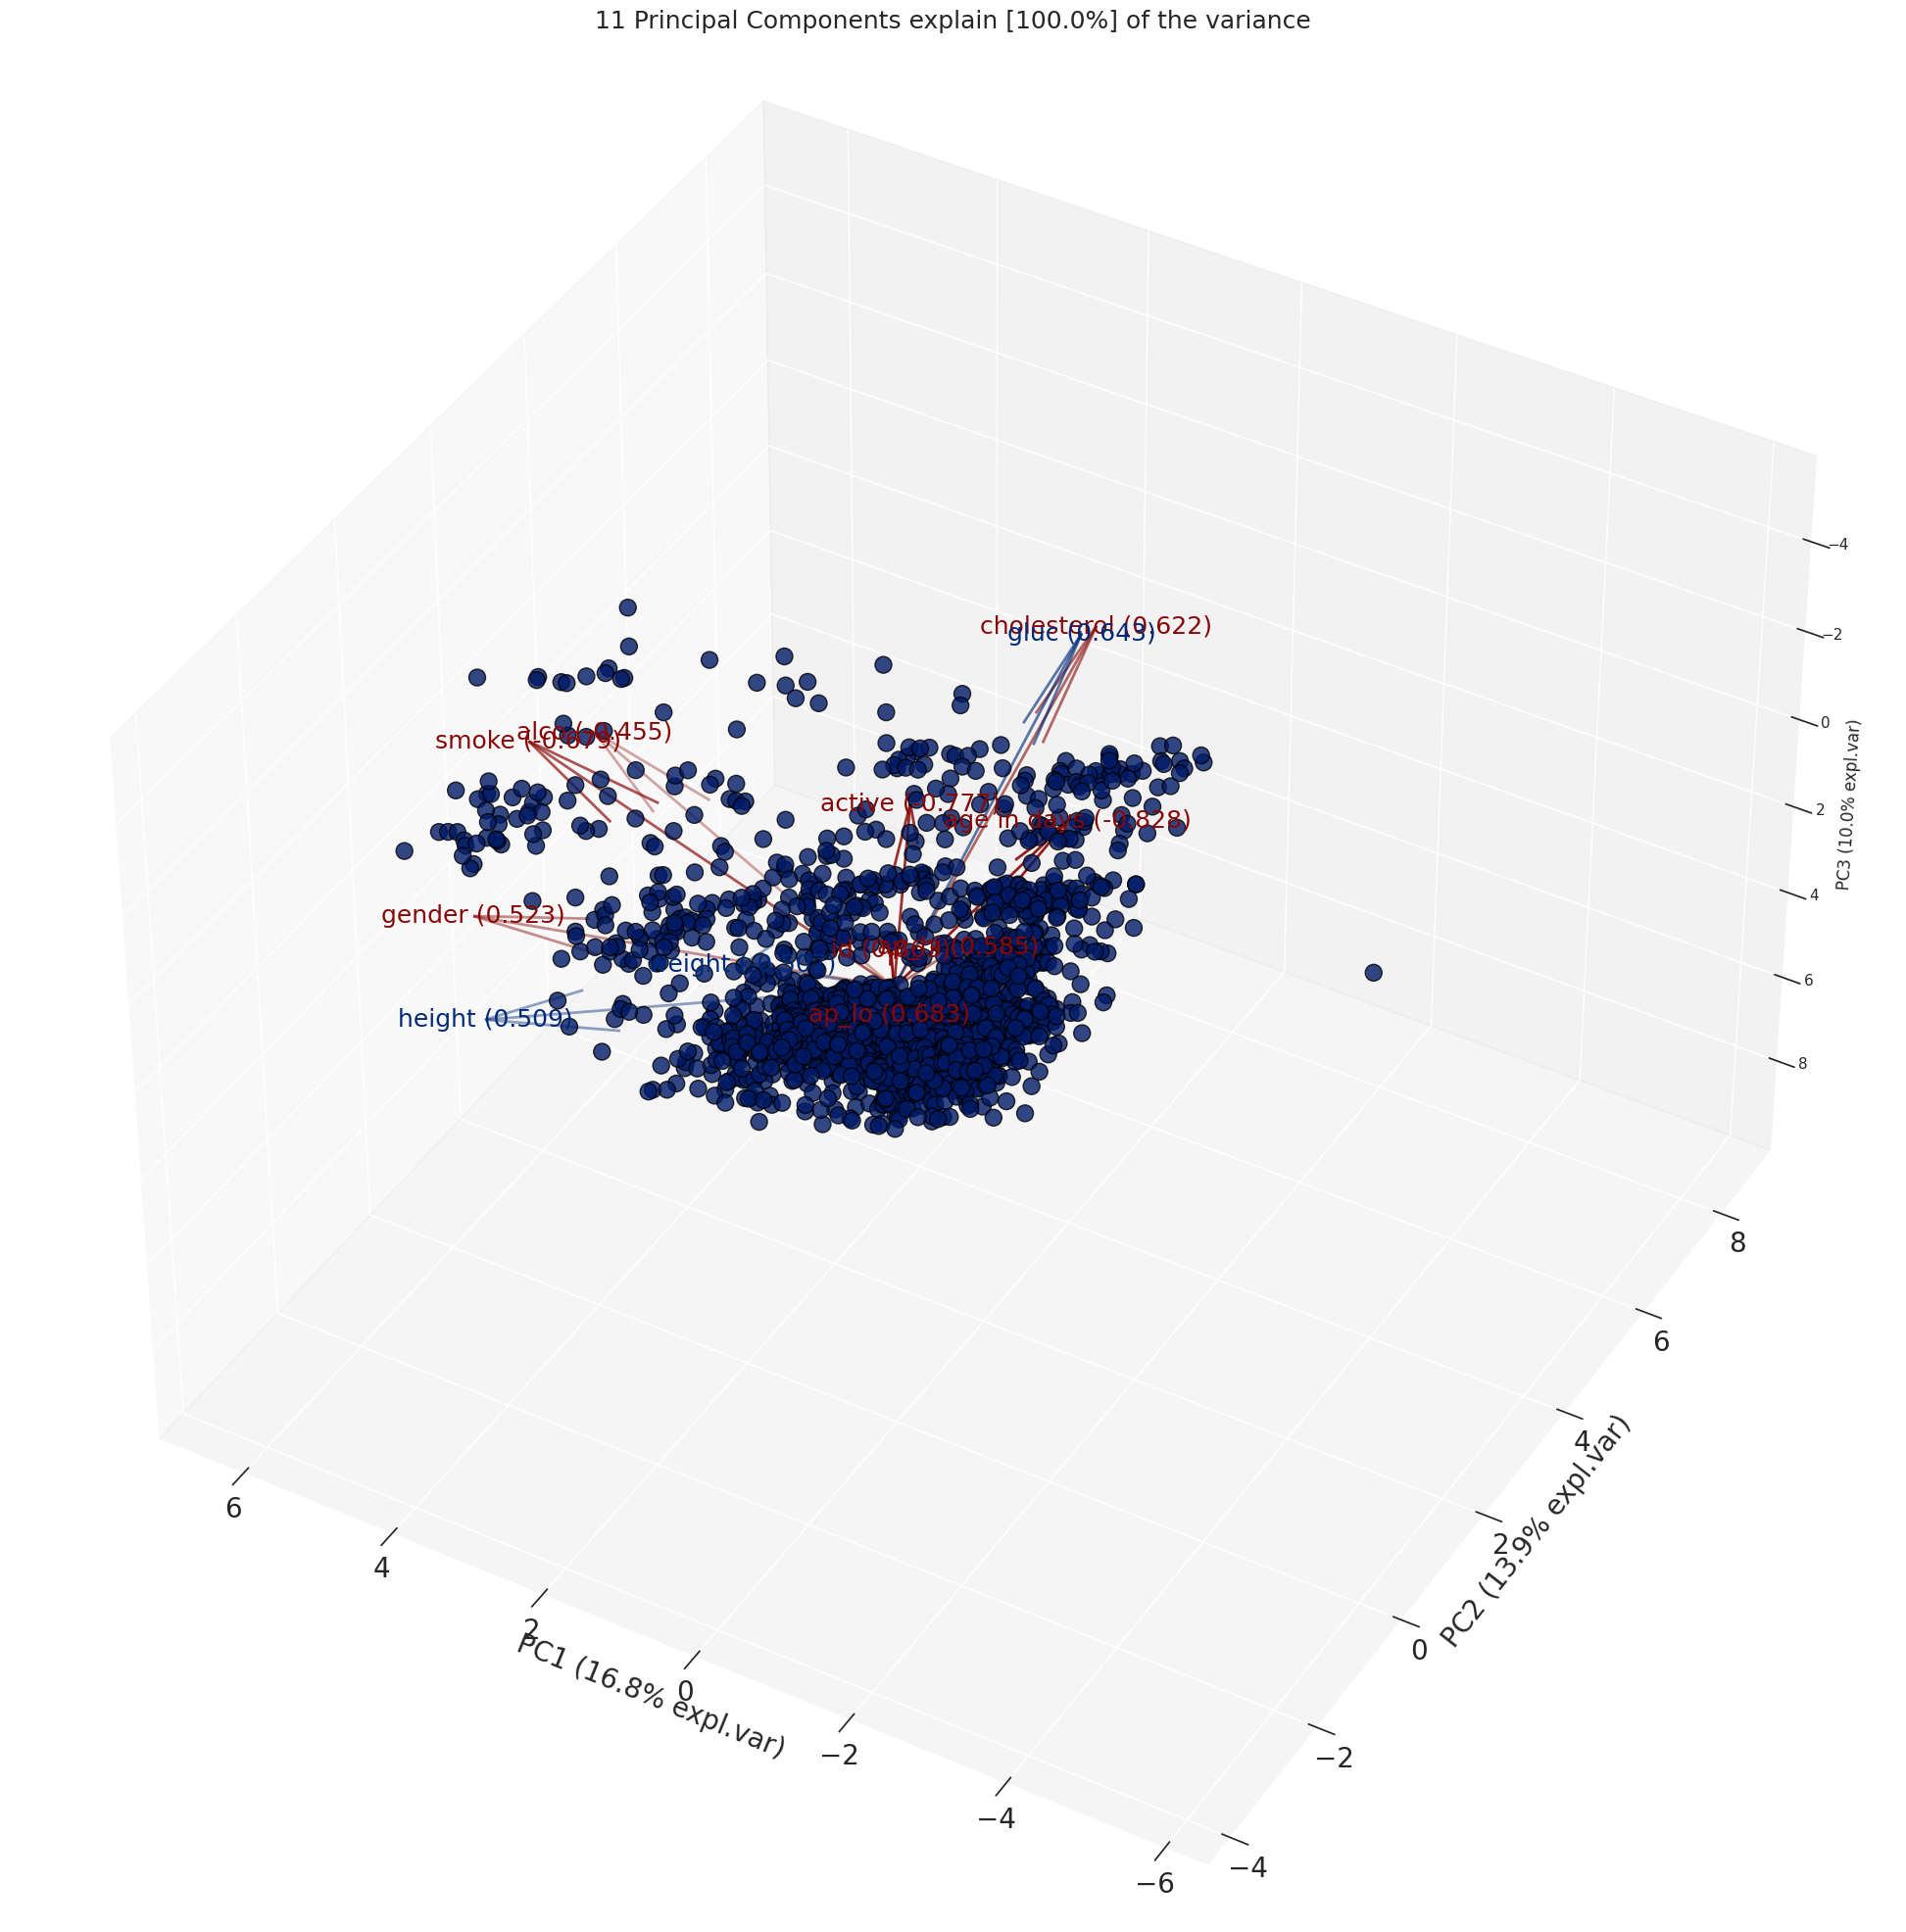

In [35]:
model.biplot3d(legend=False)

# Classification using Pycaret

At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA

In [36]:
from pycaret.utils import version
version()

'3.0.0'

In [37]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1799, 13)
Unseen Data For Predictions: (200, 13)


In [38]:
from pycaret.classification import *
clf = setup(data=data, target='cardio', train_size=0.7, session_id=123)

**Comparing All Models**

In [39]:
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [40]:
best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**Logistic Regresssion**

In [41]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune the model

In [42]:
tuned_lr=tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [43]:
tuned_lr

LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
pip install --upgrade pycaret


  Using cached pycaret-3.2.0-py3-none-any.whl (484 kB)
  Attempting uninstall: pycaret
    Found existing installation: pycaret 3.0.0
    Uninstalling pycaret-3.0.0:
      Successfully uninstalled pycaret-3.0.0


In [45]:
from pycaret.classification import *


Evaluate Logistic Regression

In [46]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with K-nearest neighbour**

In [47]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune model with K-nearest neighbour

In [48]:
tuned_knn = tune_model(knn)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [49]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')

Evaluate model with K-nearest neighbour

In [50]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with Quadratic Discriminant Analysis**

In [51]:
qda=create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune QDA Model

In [52]:
tuned_qda=tune_model(qda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [53]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.98,
                              store_covariance=False, tol=0.0001)

Evaluate QDA Model

In [54]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Classification + PCA

In [55]:
!pip install statsmodels --upgrade

In [57]:
clf_pca = setup(data=data, target='cardio', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Comparing Models

In [58]:
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Best model with PCA

In [59]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Tune Best Model

In [60]:
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Evaluate Best Model

In [61]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [62]:
lr_pca = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [63]:
tuned_lr_pca = tune_model(lr_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [64]:
tuned_lr_pca

LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [66]:
knn_pca = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [67]:
tuned_knn_pca = tune_model(knn_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [68]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=29, p=2,
                     weights='distance')

In [69]:
evaluate_model(tuned_knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [70]:
qda_pca = create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [71]:
tuned_qda_pca = tune_model(qda_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [72]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.66,
                              store_covariance=False, tol=0.0001)

In [73]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [74]:
et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [75]:
tuned_et_pca = tune_model(et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [76]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=4, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0002,
                     min_samples_leaf=5, min_samples_split=9,
                     min_weight_fraction_leaf=0.0, n_estimators=130, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [77]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [78]:
 !pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 8.3 MB/s eta 0:00:00


In [90]:
import shap

In [91]:
pip install shap


In [92]:
pip install --upgrade typing-extensions


In [93]:
pip install fastapi python-multipart uvicorn cohere openai tiktoken


In [94]:
pip install pycaret[analysis]


In [97]:
pip uninstall pycaret
pip install pycaret[full]


SyntaxError: ignored

In [98]:
conda create --name myenv python=3.8
conda activate myenv
pip install pycaret[full]


SyntaxError: ignored

In [95]:
interpret_model(tuned_et_pca, plot='summary')

ModuleNotFoundError: ignored